##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from typing import *

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

##Importing The Data and Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Unzip the data
!unzip "/content/drive/MyDrive/Datasets/Titanic Dataset/titanic.zip"

In [36]:
#Read the data with pandas read csv function
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_data = pd.concat((df_train, df_test), axis = 0)

In [37]:
dropless = ["Name", "Ticket", "PassengerId"]
df_data.drop(columns = dropless, inplace = True)

In [7]:
df_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,male,22.0,1,0,7.2500,NaN,S
1,1.0,1,female,38.0,1,0,71.2833,C85,C
2,1.0,3,female,26.0,0,0,7.9250,NaN,S
3,1.0,1,female,35.0,1,0,53.1000,C123,S
4,0.0,3,male,35.0,0,0,8.0500,NaN,S


In [38]:
df_label = df_data.iloc[:, 0]
df_data = df_data.drop("Survived", axis = 1)

In [39]:
def data_splitter(data, test_size, label):
    test_size *= 100
    train = data[:-418]
    test = data.iloc[-418:]

    label_train = np.array(label)
    return train, test, label_train

In [40]:
train, test, label_train = data_splitter(df_data, 10, df_label[:-418])

In [41]:
pipeline = Pipeline([("encoder", OrdinalEncoder()), ("imputer", KNNImputer()), ("scaler", StandardScaler()), ("regression", RandomForestClassifier())])
parameters = {'n_estimators':[1,10,100,1000], 'min_samples_split': [2,3,4,5]}

In [54]:
def train_pipe(pipeline: Pipeline, data, label, parameters: dict):

    pipeline[0:-1].fit_transform(data)
    encoded_data = pipeline[0:-1].transform(data)
    grid_pipeline = GridSearchCV(pipeline[-1], parameters)
    return grid_pipeline.fit(encoded_data, label)

In [55]:
train_data = train_pipe(pipeline, train, label_train, parameters)
train_data.best_params_

{'min_samples_split': 4, 'n_estimators': 1000}

In [59]:
best_model = train_data.best_estimator_

In [60]:
pipeline[0:-1].fit_transform(test)
encoded_test = pipeline[0:-1].transform(test)
y_preds = best_model.predict(encoded_test)

In [64]:
df_sub = pd.read_csv("gender_submission.csv")
submis = pd.concat((df_sub.iloc[:, 0], pd.DataFrame(np.array(y_preds, dtype = int))), axis = 1)
submis.rename(columns = {0: "Survived"}, inplace = True)
submis.to_csv("titanic_submission.csv", index = False)

##**Visulazing the Data**

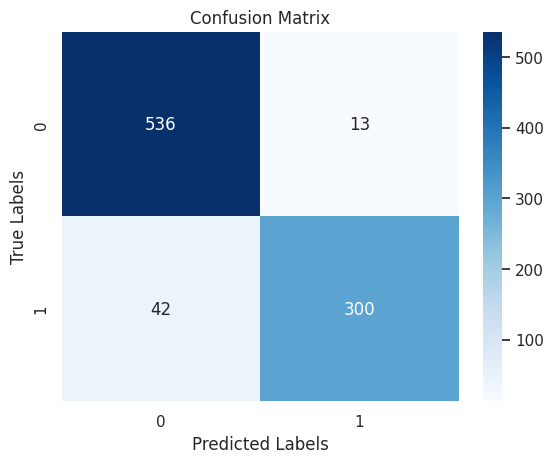

In [378]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(df_label[:-418], y_preds)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize = (8, 5))
plt.title("Titanic Visualization")
sns.countplot(data = df_train, x = "Survived", hue = "Parch")

In [ ]:
plt.figure(figsize = (8, 5))
plt.title("Titanic Visualization")
sns.histplot(data = df_train, x = "Age")